# Inaugural Project

## Introduction
This is a Python class HouseholdSpecializationModelClass that represents a household's choice between market work, home production, and leisure.

Here's a brief overview of what the different classes do:

- In the __init__() method, it sets up the model parameters and the solution namespace.
- The calc_utility() method calculates the utility of a given set of choices of market work, home production, and leisure.
- The solve_discrete() method solves the model by discretizing the choice space and finding the maximum of the utility function subject to the household's time constraint.
- The solve_continuous() method solves the model using continuous optimization by minimizing the negative of the utility function subject to the same time constraint.

The model assumes that the household's utility is a function of the consumption of market goods and home production, subject to a disutility of work. The household has a preference parameter omega that determines the relative weight of consumption of market goods and home production in the utility function. The household also has a disutility of work parameter epsilon that determines the curvature of the disutility of work function.

The household can choose how much time to allocate to market work, home production, and leisure subject to a time constraint of 24 hours. The household's home production function can take on three different functional forms depending on the value of the parameter sigma. 


#### Imports and set magics:

In [335]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code

from types import SimpleNamespace

import numpy as np
from scipy import optimize

import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import cm 
import pickle
from mpl_toolkits.mplot3d import Axes3D

from inauguralproject import HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Question 1
We illustrate how $H_F/H_M$ changes when varying $\alpha$ $\in$ {0.25, 0.50, 0.75} and $\sigma$ = {0.5, 1.0, 1.5} by firstly solving the model discretely. This is done by calling the model from the 'py' file and assigning values to alpha and sigma. 

In [336]:
# Calling the model 
model = HouseholdSpecializationModelClass()

# Defining the different values alpha and sigma can take
alpha_values = [0.25, 0.50, 0.75]
sigma_values = [0.5, 1.0, 1.5]

# Create empty arrays to store the results for each combination of alpha and sigma
HF_values = np.zeros((len(alpha_values), len(sigma_values)))
HM_values = np.zeros((len(alpha_values), len(sigma_values)))
HF_HM_ratios = np.zeros((len(alpha_values), len(sigma_values)))

# Solve the model for each combination of parameters and store the results
for i, alpha in enumerate(alpha_values):
    for j, sigma in enumerate(sigma_values):
        model.par.alpha = alpha
        model.par.sigma = sigma
        result = model.solve_discrete()
        HF_values[i,j] = result.HF
        HM_values[i,j] = result.HM
        HF_HM_ratios[i,j] = result.HF / result.HM
        
# Save the results arrays using pickle
with open('results.pkl', 'wb') as f:
    pickle.dump((alpha_values, sigma_values, HF_values, HM_values, HF_HM_ratios), f)

# Load the results arrays from the pickle file
with open('results.pkl', 'rb') as f:
    alpha_values, sigma_values, HF_values, HM_values, HF_HM_ratios = pickle.load(f)

/Users/sivertdahle/KU - Forår 23/Programming/projects-2023-team-norway/inauguralproject/inauguralproject.py:65: RuntimeWarning: divide by zero encountered in reciprocal
  else:


After finding the optimal values we plot a three dimensional plot in order to caputure all the effects. 

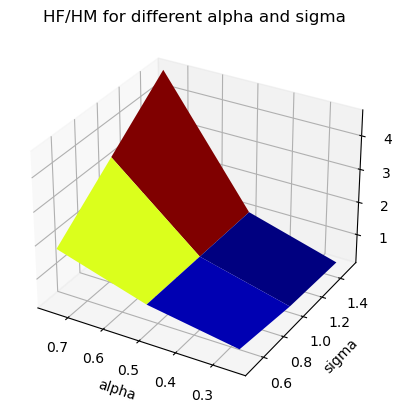

In [337]:
# making arrays for alpha and sigma
alpha = np.array([0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75]).reshape(3,3)
sigma = np.array([0.5, 1, 1.5, 0.5, 1, 1.5, 0.5, 1, 1.5]).reshape(3,3)

# a. plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(alpha,sigma,HF_HM_ratios,cmap=cm.jet)

# b. add labels
ax.set_xlabel('alpha')
ax.set_ylabel('sigma')
ax.set_zlabel('HF/HM')

# c. invert xaxis
ax.invert_xaxis()

# d. add title
ax.set_title('HF/HM for different alpha and sigma')

plt.show()

We observe that with increasing alpha and sigma the female home production relative to male home production increases.  Alpha is the female 
productivity in home production. When alpha increases, the female is more productive in home production, and therefore the amount of home production she makes is larger. As sigma represents the elasticity of substitution we see that when it increases, alongside an increase in alpha, it gets more costly to substitute female home production for male home production as the female is more productive.

## Question 2
We plot log $H_F/H_M$ against log $w_F/w_M$ for $w_F$ $\in$ $[0.8, 0.9, 1.0, 1.1, 1.2]$ using the results from question 1 but changing the female wage to differnt values to see how the agents changes their optimal solution when faced with different scenarios.


In [338]:
# Calling the model 
model = HouseholdSpecializationModelClass()

# Defining the different female wages
female_wage  = [0.8, 0.9, 1.0, 1.1, 1.2]

# Solves the model for each combination of parameters and store the results
HF_values = []
HM_values = []
HF_HM_ratios = []
for wage in female_wage:
    model.par.wF = wage
    result = model.solve_discrete()
    HF_values.append(result.HF)
    HM_values.append(result.HM)
    HF_HM_ratios.append(np.log(result.HF / result.HM))

# Saves the results arrays using pickle
with open('results2.pkl', 'wb') as f:
    pickle.dump((HF_values, HM_values, HF_HM_ratios), f)

# Loads the results arrays from the pickle file
with open('results2.pkl', 'rb') as f:
    HF_values, HM_values, HF_HM_ratios = pickle.load(f)

Then we plot the arrays against each other. 

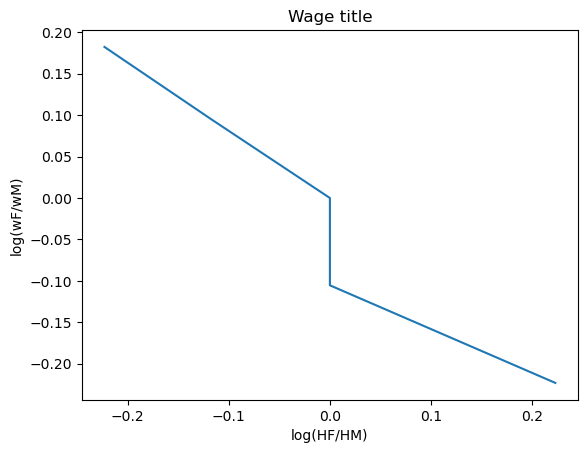

In [339]:
# Define the two arrays
Ln_HFHM = np.array(HF_HM_ratios)
female_wage  = np.array([0.8, 0.9, 1.0, 1.1, 1.2])
male_wage  = np.array([1, 1, 1, 1, 1])
Ln_Wage = np.log(female_wage / male_wage)

# Create a new figure and axis object
fig, ax = plt.subplots()

# Plot the arrays
ax.plot(Ln_HFHM, Ln_Wage)

# Add axis labels and a title
ax.set_xlabel('log(HF/HM)')
ax.set_ylabel('log(wF/wM)')
ax.set_title('Wage title')

# Display the plot
plt.show()

When female wages increase compared to the male wage, female home produciton decreases. To elaborate, wage equality also lead to equality in home prodution, whereas wage inequality leads to more disparaties in home produciton. 

## Question 3
Updated assumption: The choice of working hours is continous i.e. $L_M$, $L_F$, $H_M$, $H_F$ $\in$ [0,24]. 

We solve the model again but now continously.


In [340]:
# Calling the model 
model = HouseholdSpecializationModelClass()

# Defining the different values alpha and sigma can take
female_wage  = [0.8, 0.9, 1.0, 1.1, 1.2]


# Solve the model for each combination of parameters and store the results
HF_values = []
HM_values = []
HF_HM_ratios = []
for wage in female_wage:
    model.par.wF = wage
    result = model.solve_continuous()
    HF_values.append(result.HF)
    HM_values.append(result.HM)
    HF_HM_ratios.append(np.log(result.HF / result.HM))

# Save the results arrays using pickle
with open('results2.pkl', 'wb') as f:
    pickle.dump((HF_values, HM_values, HF_HM_ratios), f)

# Load the results arrays from the pickle file
with open('results2.pkl', 'rb') as f:
    HF_values, HM_values, HF_HM_ratios = pickle.load(f)

We plot log $H_F/H_M$ against log $w_F/w_M$ for $w_F$ $\in$ $[0.8, 0.9, 1.0, 1.1, 1.2]$.


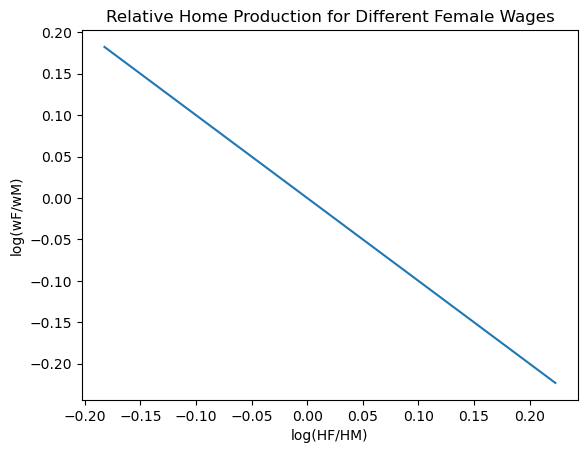

In [341]:
# Define the two arrays
Ln_HFHM = np.array(HF_HM_ratios)
female_wage  = np.array([0.8, 0.9, 1.0, 1.1, 1.2])
male_wage  = np.array([1, 1, 1, 1, 1])
Ln_Wage = np.log(female_wage / male_wage)

# Create a new figure and axis object
fig, ax = plt.subplots()

# Plot arr1 against arr2
ax.plot(Ln_HFHM, Ln_Wage)

# Add axis labels and a title
ax.set_xlabel('log(HF/HM)')
ax.set_ylabel('log(wF/wM)')
ax.set_title('Relative Home Production for Different Female Wages')

# Display the plot
plt.show()

Compared to the plot in question 2 we see that the line is now straight as the optimal solutions are continous. The same effect is captured here as in the discrete solution as a higher female wage leads her to having less home production relative to the male. 


## Question 4
We firstly use the optimal solution obtained in question 3, the HF and HM values, in order to replicate the regression conducted by Siminiski and Yetsenga. Then we find the optimal values for $\alpha$ and $\sigma$ in order to minimize the squared errors between $\beta_0$ and $\hat{\beta}_0$ and $\beta_1$ and $\hat{\beta}_1$. In order words so that $(\beta_0-\hat{\beta}_0)^2 + (\beta_1-\hat{\beta}_1)^2$ is minimized. 


In [349]:
model.solve_wF_vec(discrete=False)
reg = model.run3_regression()
model.sol.beta0
model.sol.beta1

beta0 = 2.4771087947721585e-06, beta1 = -0.1006830505406786


-0.1006830505406786

We see that with $\alpha = 0.5$ and $\sigma = 1$ our $\beta_0 = $ and $\beta_1 = -0.1006830505406786$ which is very close to the estimates Siminiski and Yetsenga. In order to minimize our error when then let $\alpha$ and $\sigma$ vary. 

In [343]:
model.estimate()

/Users/sivertdahle/KU - Forår 23/Programming/projects-2023-team-norway/inauguralproject/inauguralproject.py:65: RuntimeWarning: divide by zero encountered in double_scalars
  else:


beta0 = -2.4426029762541797e-06, beta1 = -0.9999870864642453
beta0 = 2.691924176114497e-06, beta1 = -0.5000032089477274
beta0 = 0.050042100947807526, beta1 = -0.5000019200704733
beta0 = -1.7984999668896704e-06, beta1 = -0.525003734563696
beta0 = 0.04753926275253286, beta1 = -0.47500485354314476
beta0 = 0.06762535186675761, beta1 = -0.4499760005196471
beta0 = 0.11308698866455358, beta1 = -0.4499868986567115
beta0 = 0.1612825686982894, beta1 = -0.42501395979283424
beta0 = 0.1618447193847572, beta1 = -0.37499806976380134
beta0 = 0.18916565345500208, beta1 = -0.31248472705831604
beta0 = 0.24789140410313393, beta1 = -0.2874972479672243
beta0 = 0.2682519403493365, beta1 = -0.20623914541321064


/Users/sivertdahle/KU - Forår 23/Programming/projects-2023-team-norway/inauguralproject/inauguralproject.py:65: RuntimeWarning: overflow encountered in double_scalars
  else:


beta0 = 0.1372819649978531, beta1 = -0.10238830589104794
beta0 = 0.00038071161050625356, beta1 = 2.5242077782641326e-19
beta0 = 0.22964266468394304, beta1 = -0.2312490177219501
beta0 = 0.2536915764451618, beta1 = -0.34375723014039244
beta0 = 0.2150911217462265, beta1 = -0.15624750261863699
beta0 = 0.23255537123773587, beta1 = -0.1312371870906566
beta0 = 0.30352059927114794, beta1 = -0.1812413109447794
beta0 = 0.35833005536050305, beta1 = -0.1937646137043818
beta0 = 0.36476323388737075, beta1 = -0.2687640027643787
beta0 = 0.2744481043247132, beta1 = -0.16563673952940935
beta0 = 0.36980869421371376, beta1 = -0.15313514313806417
beta0 = 0.5211907703093626, beta1 = -0.12655102810256866
beta0 = 0.5058652831271491, beta1 = -0.18125119611611773
beta0 = 0.42510235317161377, beta1 = -0.17735152992144565
beta0 = 0.47765509071993834, beta1 = -0.13672729305160974
beta0 = 0.42618070577654593, beta1 = -0.15097080863626225
beta0 = 0.3611260405670222, beta1 = -0.12675559172968429
beta0 = 0.32139729943

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 4.4944999430592584e-10
             x: [ 9.820e-01  1.000e-01]
           nit: 47
          nfev: 89
 final_simplex: (array([[ 9.820e-01,  1.000e-01],
                       [ 9.820e-01,  1.001e-01],
                       [ 9.820e-01,  1.000e-01]]), array([ 4.494e-10,  2.412e-09,  2.843e-09]))

When we minimize the squared error we find that $\alpha = 0.98200402$ and $\sigma = 0.10001879$ will produce $\hat{\beta_0}$ and $\hat{\beta_1}$ values closest to the  $\beta_0 $ and $\beta_1$ obtained by Siminki and Yetsenga. 

Then we plot how the different values of $\alpha$ and $\sigma$ produce different sizes of the squared error.

beta0 = 2.4771087947721585e-06, beta1 = -0.1006830505406786
beta0 = -0.001611035714145089, beta1 = -1.0118327472539315e-18
beta0 = -0.14756304311400525, beta1 = -0.10644092987785989
beta0 = -0.32282604992087316, beta1 = -0.0704589041555438
beta0 = -0.43991503524093317, beta1 = -0.31728078191674997
beta0 = -0.5860923649160644, beta1 = -0.422772980887829
beta0 = -0.7322709373687258, beta1 = -0.5281946621885272
beta0 = -0.8784473836950548, beta1 = -0.6336674323504733
beta0 = -1.0246197200138762, beta1 = -0.7391077914508973
beta0 = -1.1708018772639066, beta1 = -0.8445572332371987
beta0 = -1.3169858696733547, beta1 = -0.9500262329684985
beta0 = -0.001099685318139605, beta1 = -1.0118391809584379e-18
beta0 = -0.0967479061508443, beta1 = -0.10645035542092408
beta0 = -0.19258698080278083, beta1 = -0.21191009676055822
beta0 = -0.28842484732348334, beta1 = -0.31733550407912664
beta0 = -0.38427275215642903, beta1 = -0.42278444182518854
beta0 = -0.48010661476014405, beta1 = -0.5282515985054451
beta

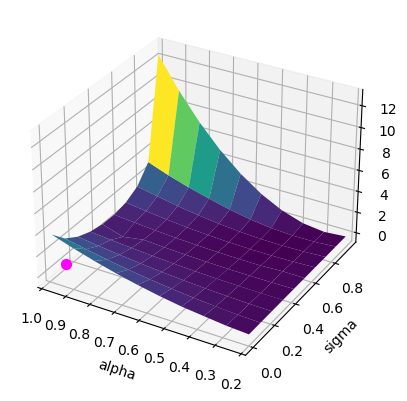

In [350]:
# Define values for alpha, sigma, and error
N = 10
alpha_vec = np.linspace(0.2, 0.985, N)
sigma_vec = np.linspace(0.001, 0.95, N)
error_values = np.zeros((N, N))

# Compute error values for all combinations of alpha and sigma
for i, alpha in enumerate(alpha_vec):
    model.par.alpha = alpha
    for j, sigma in enumerate(sigma_vec):
        model.par.sigma = sigma
        model.solve_wF_vec()
        model.run3_regression()
        error_values[i, j] = ((model.par.beta0_target - model.sol.beta0)**2) + ((model.par.beta1_target - model.sol.beta1)**2)

print(error_values)

# Plot the 3D surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
alpha_mesh, sigma_mesh = np.meshgrid(alpha_vec, sigma_vec)
ax.plot_surface(alpha_mesh, sigma_mesh, error_values, cmap='viridis')
ax.set_xlim(1, 0.2)
# ax.set_ylim(0.0, 1)
# Add a red marker for the specified point
ax.scatter(0.98200402, 0.10001879, 4.494499943063444e-10, color='magenta', s=50)

ax.set_xlabel('alpha')
ax.set_ylabel('sigma')
ax.set_zlabel('error')
plt.show()

Here we see that the squared error is minimized when we find that $\alpha = 0.98200402$ and $\sigma = 0.10001879$ as denoted by the point. The economic interpretation of this is that the woman is more productive in home production as the relative productivity is $\frac{\alpha}{1-\alpha} = \frac{0.98200402}{1-0.98200402} = 54,55$. Since $\sigma$ is = 0.1 it is hard to substitute between male and female home production. So the economic model seems to be outdated and is better at explaining society around the 1950s. 

## Question 5
We try to make an extension of the model by optimizing when $\alpha$ is held constant at 0.5. 

In [348]:
model.estimate2()

beta0 = 3.9248567273882267, beta1 = -0.4703902467644622
alpha = 0.5, sigma = 0.5
beta0 = 2.691924176114497e-06, beta1 = -0.5000032089477274
beta0 = 2.691924176114497e-06, beta1 = -0.5000032089477274
alpha = 0.5, sigma = 0.525
beta0 = -1.7984999668896704e-06, beta1 = -0.525003734563696
beta0 = -1.7984999668896704e-06, beta1 = -0.525003734563696
alpha = 0.5, sigma = 0.475
beta0 = 9.00568241094628e-07, beta1 = -0.47502792967857904
beta0 = 9.00568241094628e-07, beta1 = -0.47502792967857904
alpha = 0.5, sigma = 0.44999999999999996
beta0 = 1.5026262978216402e-06, beta1 = -0.44999981730055855
beta0 = 1.5026262978216402e-06, beta1 = -0.44999981730055855
alpha = 0.5, sigma = 0.3999999999999999
beta0 = 5.0336636288250494e-06, beta1 = -0.40000021402519265
beta0 = 5.0336636288250494e-06, beta1 = -0.40000021402519265
alpha = 0.5, sigma = 0.34999999999999987
beta0 = 1.0963881244549352e-06, beta1 = -0.34996132593528745
beta0 = 1.0963881244549352e-06, beta1 = -0.34996132593528745
alpha = 0.5, sigma = 

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.1599984848771414
             x: [ 1.007e-01]
           nit: 15
          nfev: 32
 final_simplex: (array([[ 1.007e-01],
                       [ 1.008e-01]]), array([ 1.600e-01,  1.600e-01]))

However when alpha is held constant the error is still minimized when $\sigma \approx 0.1$ but as $\alpha$ cannot vary the sqaured error becomes larger. Therefore this extension does not seem to help match the data when $\alpha = 0.5$.